In [1]:
import pandas as pd
from configobj import ConfigObj    # dnf install python3-configobj
import sqlalchemy
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
#plt.rcParams['figure.dpi']=400

config='syncFromTypeform.conf'

myNPSfields=[
    ['APiACy', '4772be8bd4f21ea2'],
    ['KPbhd6', '43afcbf9b69c2feb'],
    ['kVGmcU', '43afcbf9b69c2feb'],
    ['YRyBYh', '4629726316f59ad4'],
    ['fHUNzp', 'e6dc74518142df7a'],
    ['WwuFx0', '4a2c5e69-166e-4e44-9543-a0966b8d35f0'],
    ['WwuFx0', 'f5c7ac13-868f-4948-9195-c812ad851aa3'],
    ['WwuFx0', 'fa9adfff-5406-473b-867a-06ac4466f1b1'],
]

In [2]:
context=ConfigObj(config)
db=sqlalchemy.create_engine(context['database'], encoding='utf8')

In [3]:
fields=pd.DataFrame(myNPSfields,columns=['form_id','field_name'])

In [4]:
nps=pd.DataFrame()
for index, field in fields.iterrows():
    r=pd.read_sql_query("SELECT * FROM nps_daily_mv WHERE form_id='{}' AND field_name='{}'".format(field['form_id'],field['field_name']),db)
    nps=nps.append(r)
del r

In [5]:
nps['date']=pd.to_datetime(nps['date'],infer_datetime_format=True)
nps['NPS_cumulative_percent']=100*nps['NPS_cumulative']

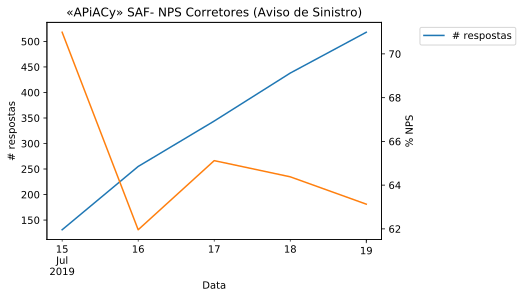

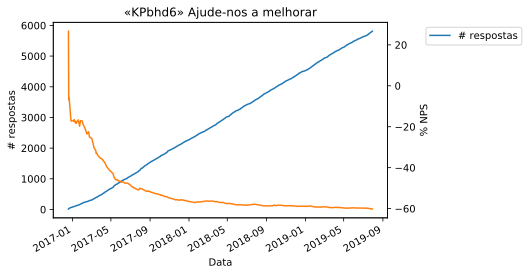

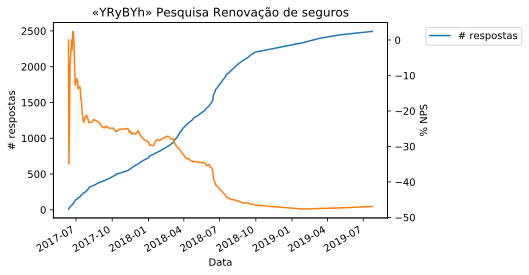

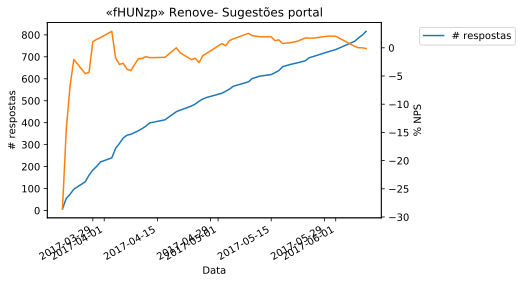

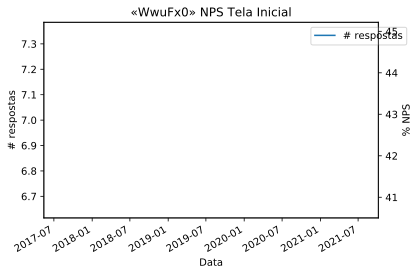

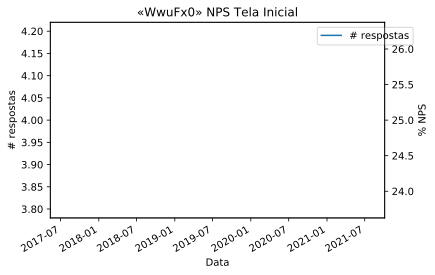

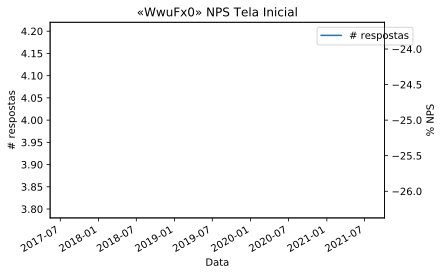

In [6]:
for index, field in fields.iterrows():
    if nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])].shape[0]>0:
        ax=nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])].sort_values(by='date').plot(
            kind='line',
            x='date',
            y='totl_cumulative',
        )


        nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])].sort_values(by='date').plot(
            kind='line',
            x='date',
            y='NPS_cumulative_percent',
            secondary_y='NPS_cumulative_percent',
            ax=ax
        )

        ax.set_title('«{}» {}'.format(
            nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])]['form_id'][0],
            nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])]['form_title'][0],

            nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])]['field_name'][0],
            nps[(nps['form_id']==field['form_id']) & (nps['field_name']==field['field_name'])]['field_title'][0]
        ))

        ax.legend(['# respostas', '% NPS'], loc='best',bbox_to_anchor=(1.1,1))
        ax.set_xlabel('Data')
        ax.set_ylabel('# respostas')
        ax.right_ax.set_ylabel('% NPS')